In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.plotting import scatter_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pubg-stats-dataset/Pubg_Stats.csv


# ****Data Loading

In [2]:
data=pd.read_csv('/kaggle/input/pubg-stats-dataset/Pubg_Stats.csv')
data.head(10)

,Unnamed: 0,Player_Name,Matches_Played,Kills,Deaths,Assists,Damage_Dealt,Headshots,Wins,Top_10s,Revives,Distance_Traveled,Weapons_Used,Time_Survived,Rank
0,0,StealthMaster,250,587,143,98,15243,234,32,145,67,72560,12,28976,Gold
1,1,SniperLion,312,823,218,112,18975,312,42,189,95,89042,15,33652,Diamond
2,2,NinjaGamer,186,492,84,56,11786,156,28,97,48,60924,10,21764,Platinum
3,3,ThunderStrike,409,923,267,134,21037,288,55,258,128,98234,18,40128,Silver
4,4,SpeedDemon,143,368,68,42,9865,123,20,72,36,52072,8,16834,Gold
5,5,BlazeFury,288,642,156,74,14238,189,35,129,57,68894,11,27345,Platinum
6,6,RapidShadow,201,539,93,68,12689,165,26,89,42,59871,9,21986,Gold
7,7,Frostbite,178,421,105,63,10572,147,18,68,39,52590,8,18743,Silver
8,8,SavageQueen,332,748,193,122,17654,272,47,211,89,78216,14,32598,Diamond
9,9,SwiftStriker,194,511,87,58,13579,182,23,83,51,56978,9,24173,Platinum


# ****Data Info

In [3]:
data.describe()

,Unnamed: 0,Matches_Played,Kills,Deaths,Assists,Damage_Dealt,Headshots,Wins,Top_10s,Revives,Distance_Traveled,Weapons_Used,Time_Survived
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,110.000000,234.624434,612.674208,142.579186,92.615385,14801.004525,207.361991,31.895928,110.357466,54.330317,61449.316742,10.859729,25444.420814
std,63.941379,37.178429,89.311216,32.882564,21.423045,1902.947975,29.775909,5.806190,23.794648,10.436145,5775.529199,1.318835,2699.278875
min,0.000000,143.000000,368.000000,68.000000,42.000000,9865.000000,123.000000,18.000000,67.000000,32.000000,49785.000000,8.000000,16834.000000
25%,55.000000,206.000000,543.000000,117.000000,76.000000,13589.000000,193.000000,28.000000,97.000000,48.000000,57856.000000,10.000000,23879.000000
50%,110.000000,224.000000,604.000000,138.000000,92.000000,14894.000000,210.000000,32.000000,108.000000,54.000000,60986.000000,11.000000,25467.000000
75%,165.000000,257.000000,674.000000,167.000000,111.000000,15987.000000,226.000000,36.000000,125.000000,60.000000,64279.000000,12.000000,26987.000000
max,220.000000,409.000000,923.000000,267.000000,139.000000,21037.000000,312.000000,55.000000,258.000000,128.000000,98234.000000,18.000000,40128.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         221 non-null    int64 
 1   Player_Name        221 non-null    object
 2   Matches_Played     221 non-null    int64 
 3   Kills              221 non-null    int64 
 4   Deaths             221 non-null    int64 
 5   Assists            221 non-null    int64 
 6   Damage_Dealt       221 non-null    int64 
 7   Headshots          221 non-null    int64 
 8   Wins               221 non-null    int64 
 9   Top_10s            221 non-null    int64 
 10  Revives            221 non-null    int64 
 11  Distance_Traveled  221 non-null    int64 
 12  Weapons_Used       221 non-null    int64 
 13  Time_Survived      221 non-null    int64 
 14  Rank               221 non-null    object
dtypes: int64(13), object(2)
memory usage: 26.0+ KB


In [5]:
data = data.select_dtypes(include=['int64']) 

In [6]:
data.isna().sum()

Unnamed: 0           0
Matches_Played       0
Kills                0
Deaths               0
Assists              0
Damage_Dealt         0
Headshots            0
Wins                 0
Top_10s              0
Revives              0
Distance_Traveled    0
Weapons_Used         0
Time_Survived        0
dtype: int64

In [7]:
df=pd.read_csv('/kaggle/input/pubg-stats-dataset/Pubg_Stats.csv')
df.head()

,Unnamed: 0,Player_Name,Matches_Played,Kills,Deaths,Assists,Damage_Dealt,Headshots,Wins,Top_10s,Revives,Distance_Traveled,Weapons_Used,Time_Survived,Rank
0,0,StealthMaster,250,587,143,98,15243,234,32,145,67,72560,12,28976,Gold
1,1,SniperLion,312,823,218,112,18975,312,42,189,95,89042,15,33652,Diamond
2,2,NinjaGamer,186,492,84,56,11786,156,28,97,48,60924,10,21764,Platinum
3,3,ThunderStrike,409,923,267,134,21037,288,55,258,128,98234,18,40128,Silver
4,4,SpeedDemon,143,368,68,42,9865,123,20,72,36,52072,8,16834,Gold


In [8]:
data.columns

Index(['Unnamed: 0', 'Matches_Played', 'Kills', 'Deaths', 'Assists',
       'Damage_Dealt', 'Headshots', 'Wins', 'Top_10s', 'Revives',
       'Distance_Traveled', 'Weapons_Used', 'Time_Survived'],
      dtype='object')

In [9]:
df.columns

Index(['Unnamed: 0', 'Player_Name', 'Matches_Played', 'Kills', 'Deaths',
       'Assists', 'Damage_Dealt', 'Headshots', 'Wins', 'Top_10s', 'Revives',
       'Distance_Traveled', 'Weapons_Used', 'Time_Survived', 'Rank'],
      dtype='object')

In [10]:
print(df["Player_Name"])

0        StealthMaster
1           SniperLion
2           NinjaGamer
3        ThunderStrike
4           SpeedDemon
            ...       
216       CrimsonRider
217    BlazingSorcerer
218        FrozenFlare
219      AbyssGuardian
220    SpectralPhantom
Name: Player_Name, Length: 221, dtype: object


In [11]:
corel=data.corr()
corel

,Unnamed: 0,Matches_Played,Kills,Deaths,Assists,Damage_Dealt,Headshots,Wins,Top_10s,Revives,Distance_Traveled,Weapons_Used,Time_Survived
Unnamed: 0,1.000000,-0.065546,0.005367,0.007638,0.174565,0.036636,0.082428,0.003196,-0.126209,-0.071373,-0.114519,0.008624,0.040944
Matches_Played,-0.065546,1.000000,0.969942,0.951848,0.888980,0.943678,0.884856,0.946748,0.940573,0.923870,0.932789,0.922247,0.941013
Kills,0.005367,0.969942,1.000000,0.975833,0.931733,0.981199,0.933143,0.959834,0.917499,0.912431,0.907800,0.923121,0.939393
Deaths,0.007638,0.951848,0.975833,1.000000,0.942156,0.966610,0.929560,0.941585,0.913358,0.906936,0.902849,0.919008,0.928344
Assists,0.174565,0.888980,0.931733,0.942156,1.000000,0.934713,0.900181,0.894324,0.824510,0.826797,0.815687,0.877620,0.879292
Damage_Dealt,0.036636,0.943678,0.981199,0.966610,0.934713,1.000000,0.959136,0.961294,0.918733,0.914983,0.902234,0.920417,0.950782
Headshots,0.082428,0.884856,0.933143,0.929560,0.900181,0.959136,1.000000,0.934000,0.902778,0.905075,0.882113,0.885283,0.939821
Wins,0.003196,0.946748,0.959834,0.941585,0.894324,0.961294,0.934000,1.000000,0.952223,0.938328,0.914308,0.920543,0.952757
Top_10s,-0.126209,0.940573,0.917499,0.913358,0.824510,0.918733,0.902778,0.952223,1.000000,0.980186,0.969645,0.929781,0.955888
Revives,-0.071373,0.923870,0.912431,0.906936,0.826797,0.914983,0.905075,0.938328,0.980186,1.000000,0.967410,0.932714,0.955732


# ****Exploratory Data Analysis

# Coorelation

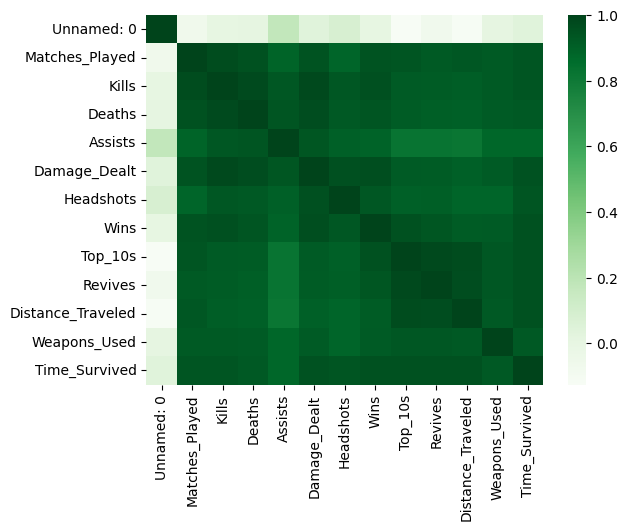

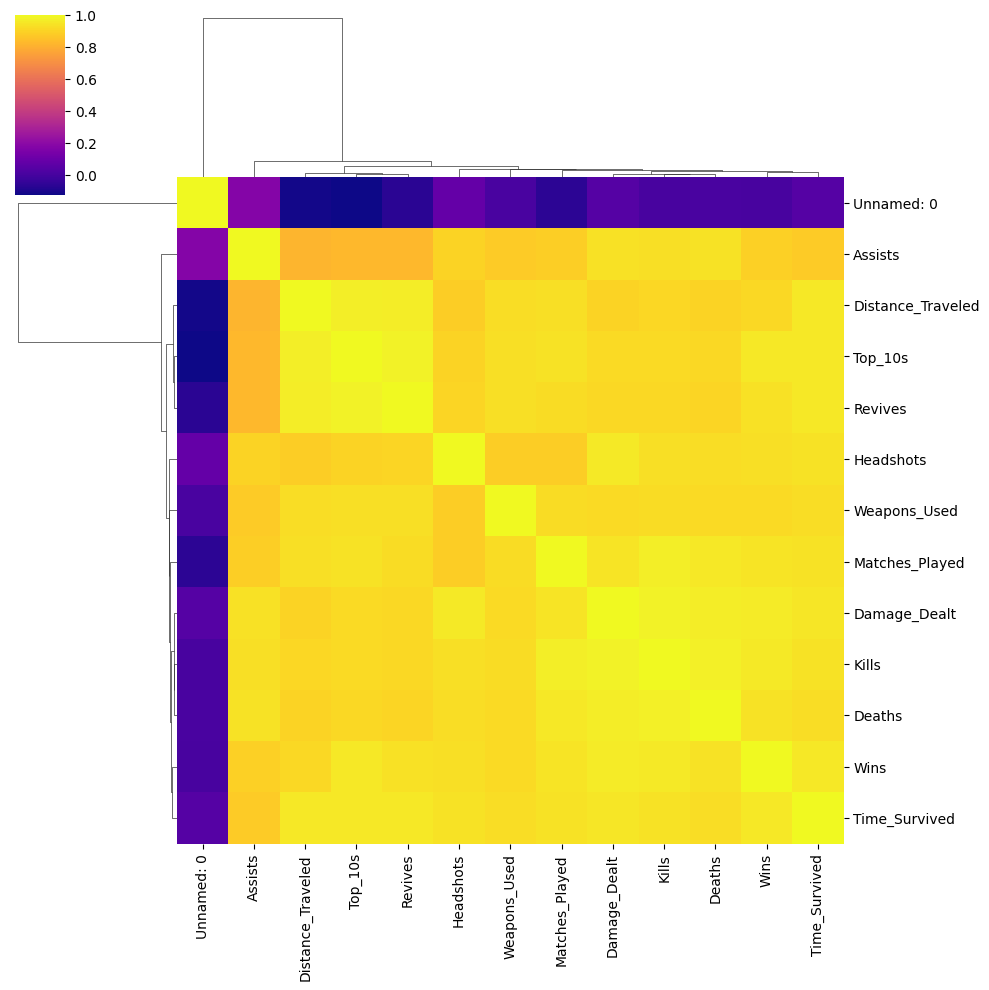

In [12]:
sns.heatmap(corel,cmap='Greens')
plt.show()

sns.clustermap(corel,cmap='plasma')
plt.show()

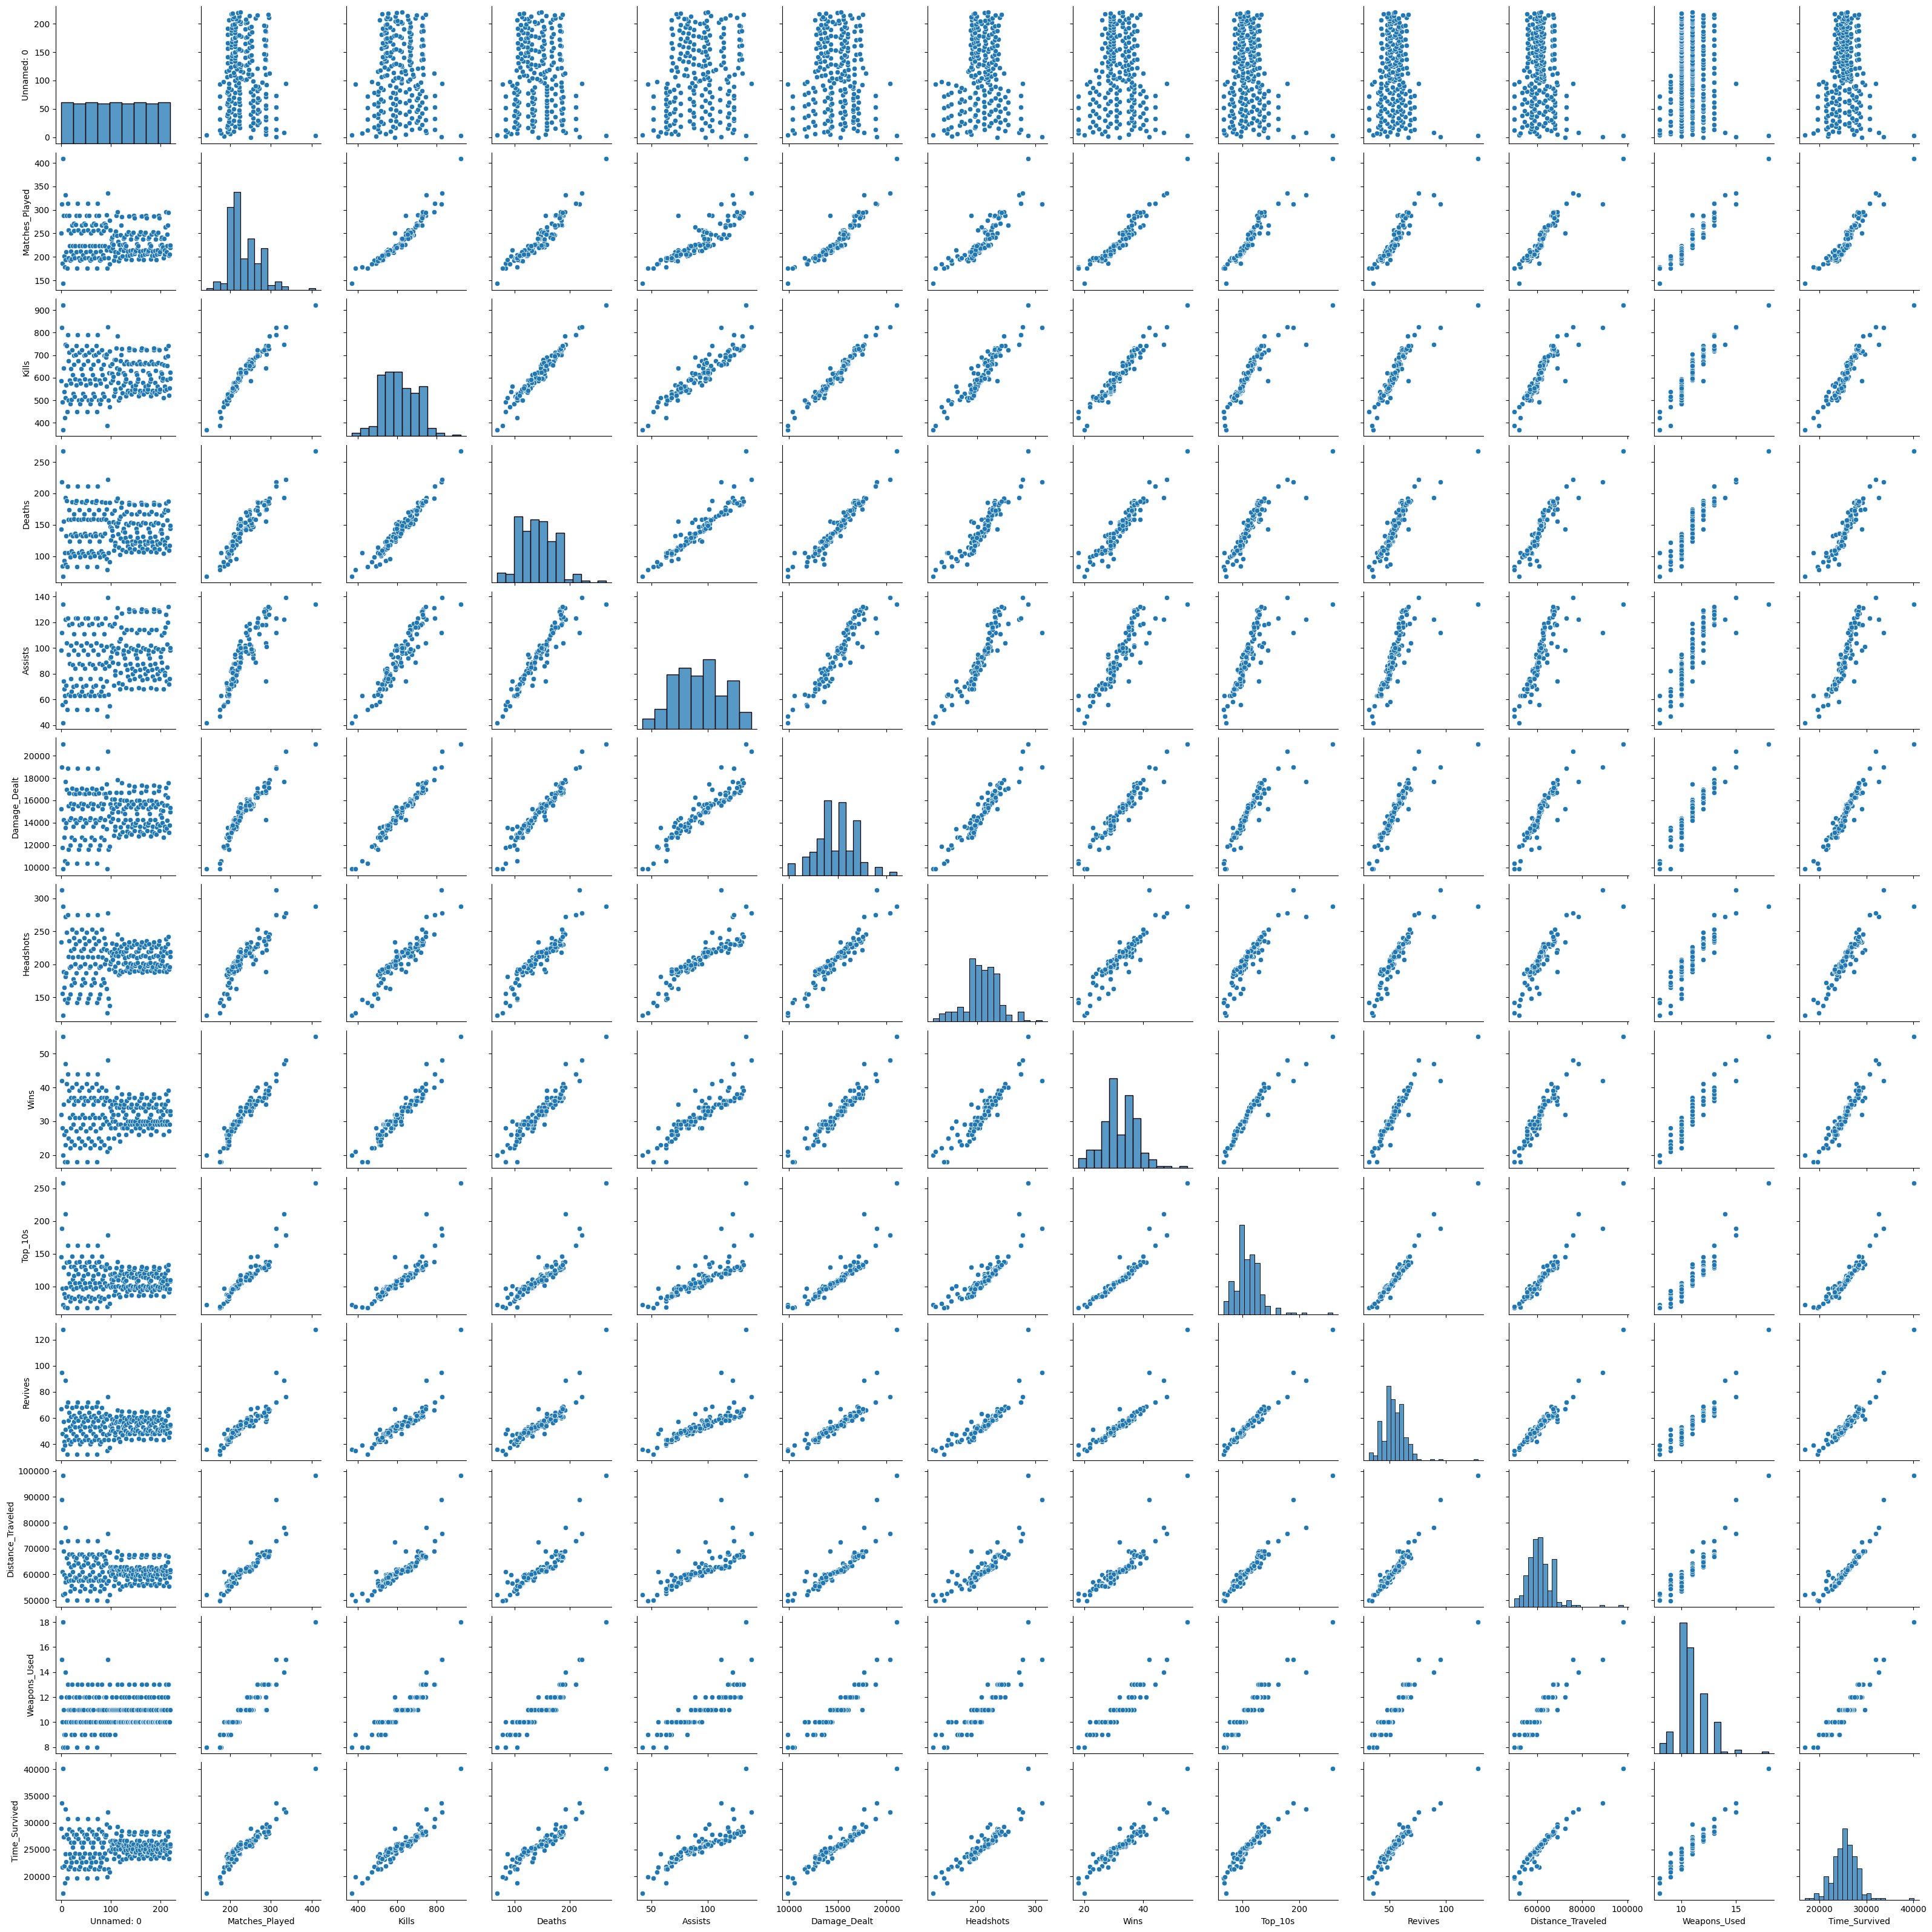

In [13]:
sns.pairplot(df)
plt.show()

# Scatter matrix for selected columns

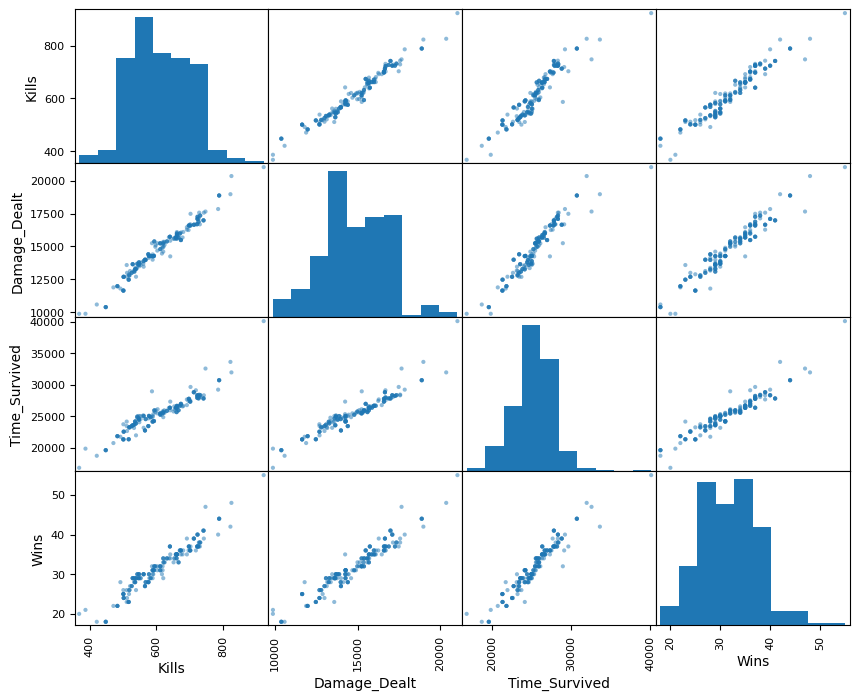

In [14]:
selected_columns = ["Kills", "Damage_Dealt", "Time_Survived", "Wins"]
scatter_matrix(data[selected_columns], figsize=(10, 8), diagonal='hist')
plt.show()

# Top 10 Player Names with the most Matches Played

In [15]:
bar_top_10_players = px.bar(df, x="Player_Name", y="Matches_Played", title="Top 10 Players by Matches Played")
bar_top_10_players.show()


Top 10 Players and their Headshots

# Top 10 Players and their Headshots

In [16]:
bar_10_players = px.bar(df, x="Player_Name", y="Headshots", title="Top 10 Players and their Headshots")
bar_10_players.show()

# Top 10 Players and their Kills

In [17]:
bar_10_players_kills = px.bar(df, x="Player_Name", y="Kills", title="Top 10 Players and their Kills")
bar_10_players_kills.show()

# Number of Matches played vs Headshots in it 

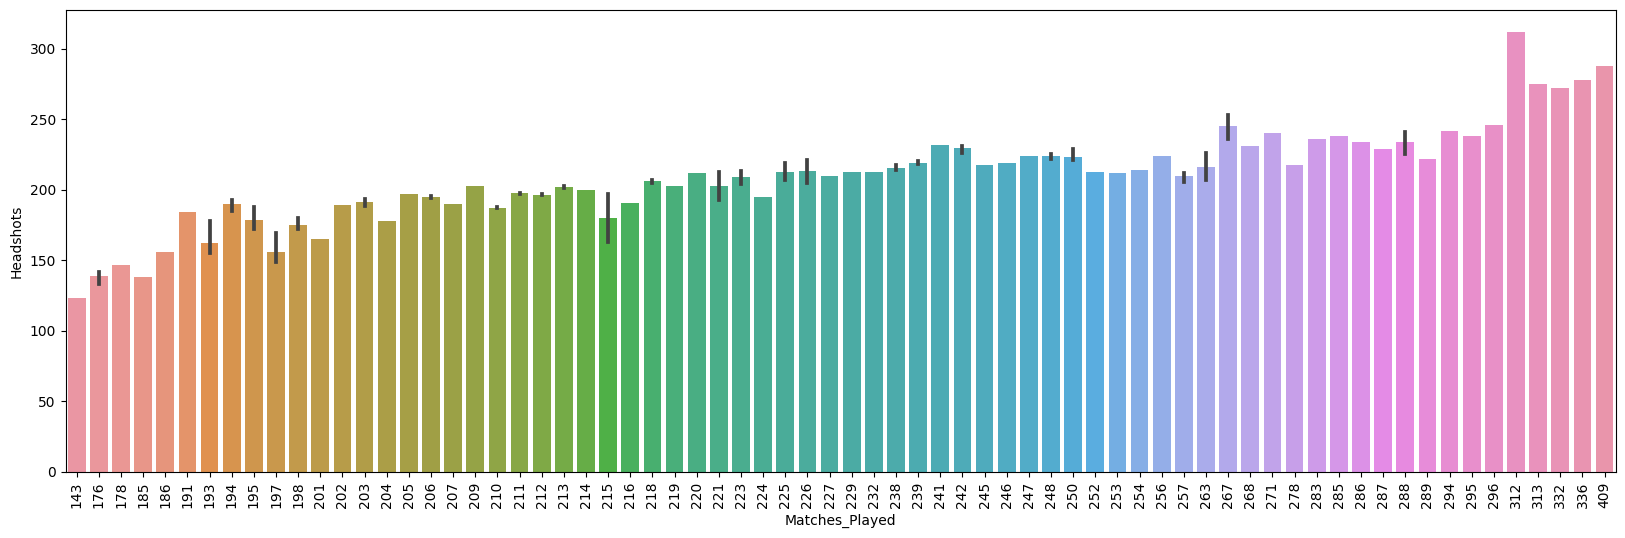

In [18]:
plt.figure(figsize=(20, 6))
sns.barplot(data=data,x='Matches_Played',y='Headshots')
plt.xticks(rotation=90)
plt.show()

# Number of Matches played vs Top10 position in it

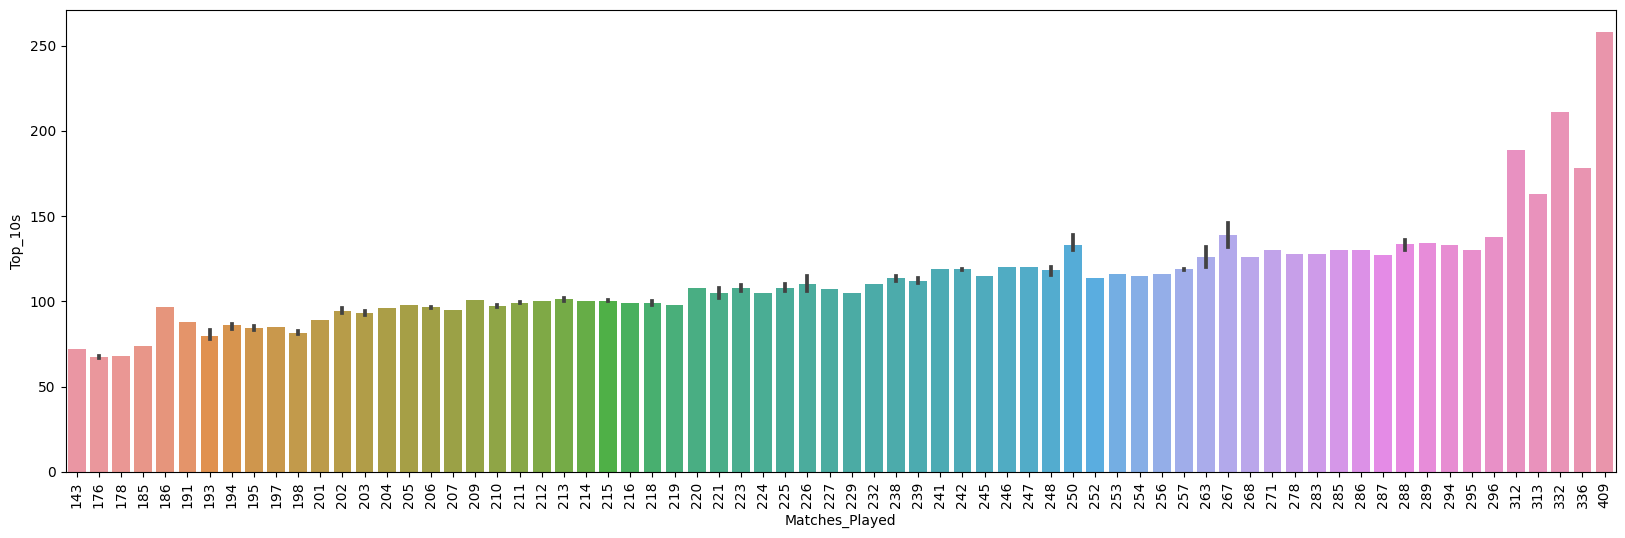

In [19]:
plt.figure(figsize=(20, 6))
sns.barplot(data=data,x='Matches_Played',y='Top_10s')
plt.xticks(rotation=90)
plt.show()

# Number of Matches played vs Wins in it

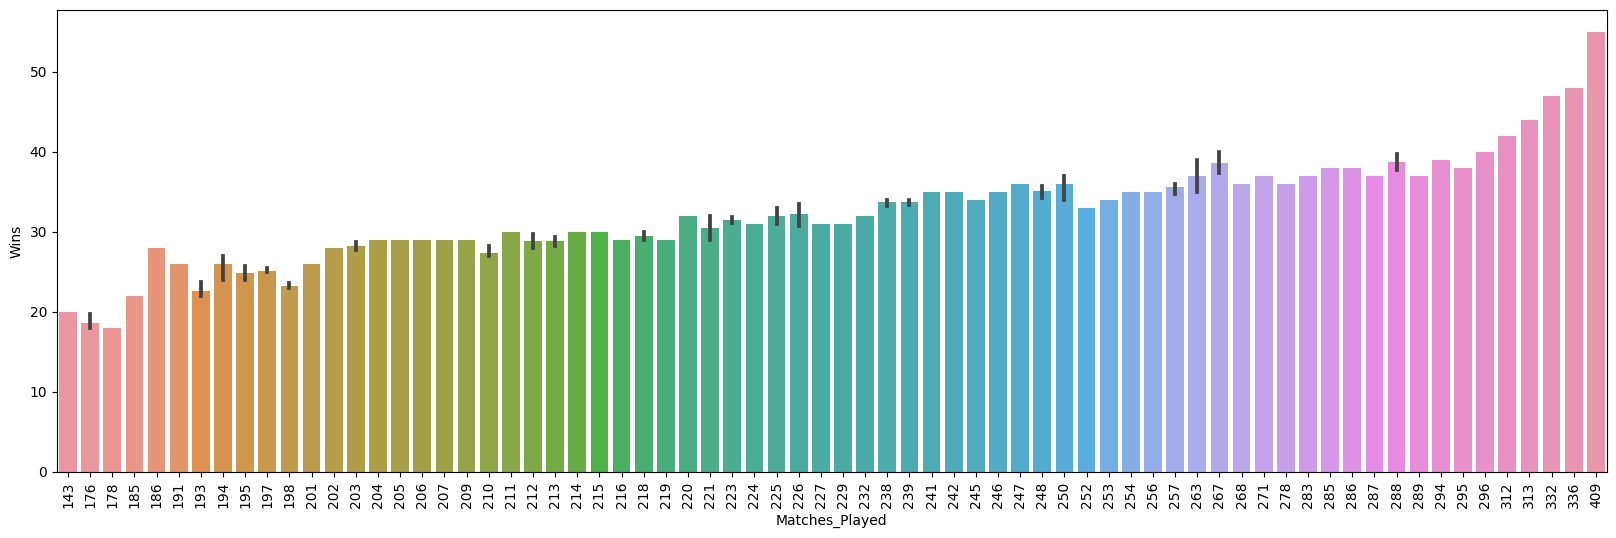

In [20]:
plt.figure(figsize=(20, 6))
sns.barplot(data=data,x='Matches_Played',y='Wins')
plt.xticks(rotation=90)
plt.show()

# Wins

In [21]:
histogram_wins = px.histogram(data, x="Wins", title="Distribution of Wins")
histogram_wins.show()

# Number of Matches played vs Kills in it

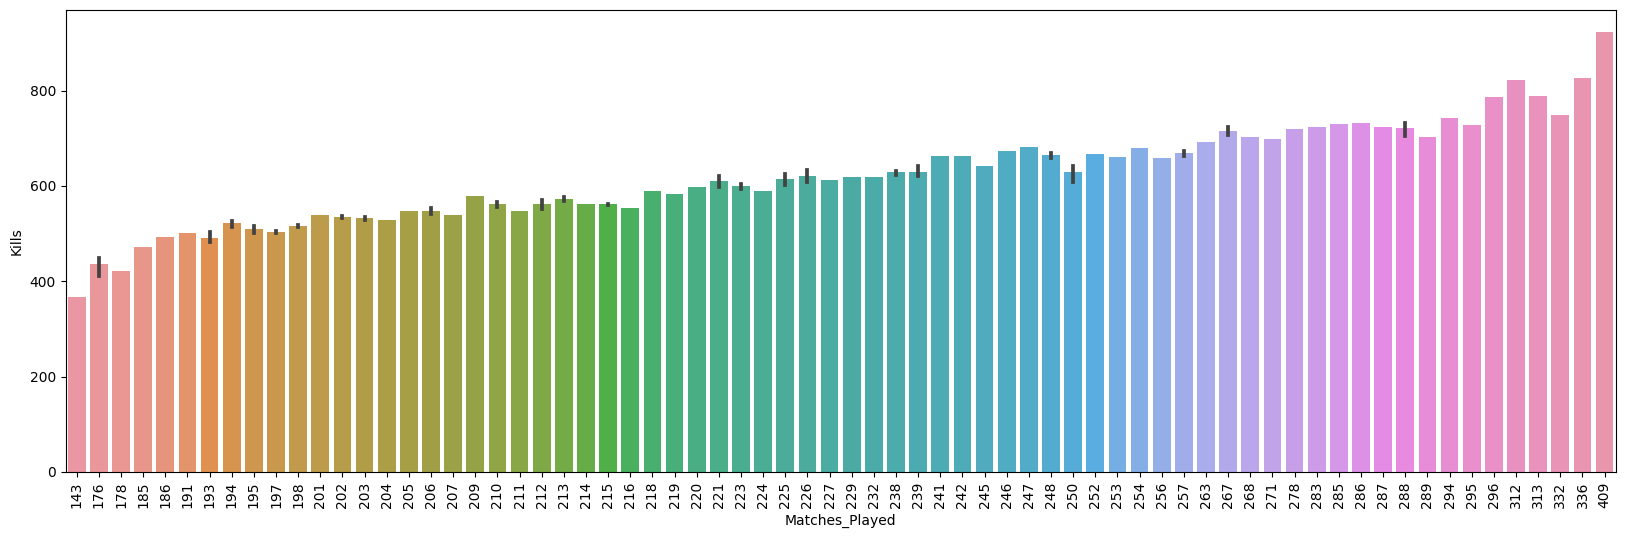

In [22]:
plt.figure(figsize=(20, 6))
sns.barplot(data=data,x='Matches_Played',y='Kills')
plt.xticks(rotation=90)
plt.show()

# Plot a histogram of the 'Kills' column

In [23]:
fig = px.histogram(data, x='Kills', nbins=20)
fig.show()

fig = px.violin(data, y='Kills')
fig.show()


# Plot a scatter plot of 'Kills' vs 'Wins'

In [24]:
fig = px.scatter(data, x='Kills', y='Wins')
fig.show()

# Plot a scatter matrix of the 'Kills', 'Wins', and 'Deaths' columns

In [25]:
fig = px.scatter_matrix(data, dimensions=['Kills', 'Wins', 'Deaths'])
fig.show()

scatter_3d = px.scatter_3d(df, x="Kills", y="Deaths", z="Wins", color="Rank", title="3D Scatter Plot of Kills, Deaths, and Wins")
scatter_3d.show()


# Kills vs. Deaths

In [26]:
scatter_kills_deaths = px.scatter(data, x="Kills", y="Deaths", title="Kills vs. Deaths")
scatter_kills_deaths.show()

#  Rank

In [27]:
bar_rank = px.bar(df, x="Rank", title="Distribution of Rank")
bar_rank.show()

# Time Survived by Rank

In [28]:
boxplot_time_survived_rank = px.box(df, x="Rank", y="Time_Survived", title="Time Survived by Rank")
boxplot_time_survived_rank.show()

#  Damage Dealt by Rank

In [29]:
boxplot_damage_rank = px.box(df, x="Rank", y="Damage_Dealt", title="Damage Dealt by Rank")
boxplot_damage_rank.show()



# 3D scatter plot of Damage Dealt, Time Survived, and Kills

In [30]:
scatter_3d_damage_time_kills = px.scatter_3d(df, x="Damage_Dealt", y="Time_Survived", z="Kills", color="Rank", title="3D Scatter Plot of Damage Dealt, Time Survived, and Kills")
scatter_3d_damage_time_kills.show()


# 3D scatter plot of Assists, Revives, and Headshots

In [31]:
scatter_3d_assists_revives_headshots = px.scatter_3d(df, x="Assists", y="Revives", z="Headshots", color="Rank", title="3D Scatter Plot of Assists, Revives, and Headshots")
scatter_3d_assists_revives_headshots.show()

# 3D scatter plot of Matches Played, Weapons Used, and Distance Traveled

In [32]:
scatter_3d_matches_weapons_distance = px.scatter_3d(df, x="Matches_Played", y="Weapons_Used", z="Distance_Traveled", color="Rank", title="3D Scatter Plot of Matches Played, Weapons Used, and Distance Traveled")
scatter_3d_matches_weapons_distance.show()